In [10]:
#Importing required libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns

#import sklearn as metrics 
#import sklearn.model_selection import train_test_split

#To enable ploting graphs in Jupyter notebook
%matplotlib inline 

#add a good background to our plots
sns.set(color_codes=True)

In [11]:
Food_price_data = pd.read_csv("Desktop/Joshua's folder/Data visualization and analytics/Dataset for projects/WFP_2020Oct23.csv")

# Inspecting the data

In [12]:
Food_price_data.columns

Index(['Country', 'Admin 1', 'Market', 'Commodity', 'Price Type', 'Year',
       'Month', 'Price', 'Unit', 'Currency', 'Data Source'],
      dtype='object')

In [13]:
Food_price_data.shape

(24706, 11)

In [14]:
Food_price_data.size

271766

In [15]:
Food_price_data.head()

,Country,Admin 1,Market,Commodity,Price Type,Year,Month,Price,Unit,Currency,Data Source
0,Ghana,Ashanti,Kumasi,Maize,Wholesale,2006,1,25.40,100 KG,GHS,Marketing Services Unit; SRID (MOFA) via FAO: ...
1,Ghana,Ashanti,Kumasi,Maize,Wholesale,2006,2,21.75,100 KG,GHS,Marketing Services Unit; SRID (MOFA) via FAO: ...
2,Ghana,Ashanti,Kumasi,Maize,Wholesale,2006,3,21.21,100 KG,GHS,Marketing Services Unit; SRID (MOFA) via FAO: ...
3,Ghana,Ashanti,Kumasi,Maize,Wholesale,2006,4,20.88,100 KG,GHS,Marketing Services Unit; SRID (MOFA) via FAO: ...
4,Ghana,Ashanti,Kumasi,Maize,Wholesale,2006,5,22.00,100 KG,GHS,Marketing Services Unit; SRID (MOFA) via FAO: ...


In [16]:
Food_price_data.tail()

,Country,Admin 1,Market,Commodity,Price Type,Year,Month,Price,Unit,Currency,Data Source
24701,Ghana,Western,Sekondi/Takoradi,Meat (chicken local),Wholesale,2020,2,NaN,10 KG,GHS,NaN
24702,Ghana,Western,Sekondi/Takoradi,Meat (chicken local),Wholesale,2020,3,NaN,10 KG,GHS,NaN
24703,Ghana,Western,Sekondi/Takoradi,Meat (chicken local),Wholesale,2020,4,NaN,10 KG,GHS,NaN
24704,Ghana,Western,Sekondi/Takoradi,Meat (chicken local),Wholesale,2020,5,236.0,10 KG,GHS,MOFA
24705,Ghana,Western,Sekondi/Takoradi,Meat (chicken local),Wholesale,2020,6,239.0,10 KG,GHS,MOFA


In [17]:
Food_price_data.dtypes

Country         object
Admin 1         object
Market          object
Commodity       object
Price Type      object
Year             int64
Month            int64
Price          float64
Unit            object
Currency        object
Data Source     object
dtype: object

In [18]:
Food_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24706 entries, 0 to 24705
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      24706 non-null  object 
 1   Admin 1      24706 non-null  object 
 2   Market       24706 non-null  object 
 3   Commodity    24706 non-null  object 
 4   Price Type   24706 non-null  object 
 5   Year         24706 non-null  int64  
 6   Month        24706 non-null  int64  
 7   Price        18079 non-null  float64
 8   Unit         24706 non-null  object 
 9   Currency     24706 non-null  object 
 10  Data Source  18079 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 1.3+ MB


# Checking for missing values and Cleaning Data

In [19]:
Food_price_data.isnull()

,Country,Admin 1,Market,Commodity,Price Type,Year,Month,Price,Unit,Currency,Data Source
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
24701,False,False,False,False,False,False,False,True,False,False,True
24702,False,False,False,False,False,False,False,True,False,False,True
24703,False,False,False,False,False,False,False,True,False,False,True
24704,False,False,False,False,False,False,False,False,False,False,False


In [20]:
Food_price_data.isnull().sum()

Country           0
Admin 1           0
Market            0
Commodity         0
Price Type        0
Year              0
Month             0
Price          6627
Unit              0
Currency          0
Data Source    6627
dtype: int64

In [21]:
threshold = len(Food_price_data)* 0.1
threshold

2470.6000000000004

In [22]:
Food_price_data.dropna(thresh=threshold, axis=1, inplace=True)

In [23]:
print(Food_price_data.isnull().sum())

Country           0
Admin 1           0
Market            0
Commodity         0
Price Type        0
Year              0
Month             0
Price          6627
Unit              0
Currency          0
Data Source    6627
dtype: int64


In [24]:
#confirm the dataframe shape
Food_price_data.shape

(24706, 11)

In [25]:
Food_price_data[Food_price_data.Price.isnull()]

,Country,Admin 1,Market,Commodity,Price Type,Year,Month,Price,Unit,Currency,Data Source
115,Ghana,Ashanti,Kumasi,Maize,Wholesale,2015,8,NaN,100 KG,GHS,NaN
116,Ghana,Ashanti,Kumasi,Maize,Wholesale,2015,9,NaN,100 KG,GHS,NaN
179,Ghana,Ashanti,Kumasi,Maize,Retail,2019,10,NaN,KG,GHS,NaN
180,Ghana,Ashanti,Kumasi,Maize,Retail,2019,11,NaN,KG,GHS,NaN
181,Ghana,Ashanti,Kumasi,Maize,Retail,2019,12,NaN,KG,GHS,NaN
...,...,...,...,...,...,...,...,...,...,...,...
24699,Ghana,Western,Sekondi/Takoradi,Meat (chicken local),Wholesale,2019,12,NaN,10 KG,GHS,NaN
24700,Ghana,Western,Sekondi/Takoradi,Meat (chicken local),Wholesale,2020,1,NaN,10 KG,GHS,NaN
24701,Ghana,Western,Sekondi/Takoradi,Meat (chicken local),Wholesale,2020,2,NaN,10 KG,GHS,NaN
24702,Ghana,Western,Sekondi/Takoradi,Meat (chicken local),Wholesale,2020,3,NaN,10 KG,GHS,NaN


In [26]:
#drop missing values in the price column
Food_price_data = Food_price_data.dropna(how="any", subset=["Price"])

In [27]:
Food_price_data.isnull().sum()

Country        0
Admin 1        0
Market         0
Commodity      0
Price Type     0
Year           0
Month          0
Price          0
Unit           0
Currency       0
Data Source    0
dtype: int64

In [28]:
Food_price_data.shape

(18079, 11)

# Analyzing and Visualizing the Data

In [29]:
Food_price_data.describe()

,Year,Month,Price
count,18079.000000,18079.000000,18079.000000
mean,2014.688257,6.377344,110.774590
std,4.391247,3.205018,134.531512
min,2006.000000,1.000000,0.320000
25%,2011.000000,4.000000,17.665000
50%,2015.000000,7.000000,67.250000
75%,2019.000000,9.000000,156.250000
max,2020.000000,12.000000,1476.560000


In [30]:
# Central Tendency Calculations
print('MEAN: \n',Food_price_data.mean())
print('\r \n')

print('MEDIAN: \n',Food_price_data.median())
print('\r \n')

print('MODE: \n',Food_price_data.mode())
print('\r \n')

print('STD: \n',Food_price_data.std())
print('\r \n')

print('Q1-Quartile 1: \n',Food_price_data.quantile(q=(0.25,0.50,0.75)))

MEAN: 
 Year     2014.688257
Month       6.377344
Price     110.774590
dtype: float64
 

MEDIAN: 
 Year     2015.00
Month       7.00
Price      67.25
dtype: float64
 

MODE: 
   Country  Admin 1  Market Commodity Price Type  Year  Month  Price   Unit  \
0   Ghana  Ashanti  Kumasi     Maize  Wholesale  2020      8  100.0  50 KG   

  Currency Data Source  
0      GHS        MOFA  
 

STD: 
 Year       4.391247
Month      3.205018
Price    134.531512
dtype: float64
 

Q1-Quartile 1: 
         Year  Month    Price
0.25  2011.0    4.0   17.665
0.50  2015.0    7.0   67.250
0.75  2019.0    9.0  156.250


In [31]:
Food_price_data['Price'].describe()

count    18079.000000
mean       110.774590
std        134.531512
min          0.320000
25%         17.665000
50%         67.250000
75%        156.250000
max       1476.560000
Name: Price, dtype: float64

In [32]:
Food_price_data['Commodity'].describe()

count     18079
unique       26
top       Maize
freq       2364
Name: Commodity, dtype: object

In [33]:
Food_price_data['Year'].describe()

count    18079.000000
mean      2014.688257
std          4.391247
min       2006.000000
25%       2011.000000
50%       2015.000000
75%       2019.000000
max       2020.000000
Name: Year, dtype: float64

<AxesSubplot:xlabel='Price'>

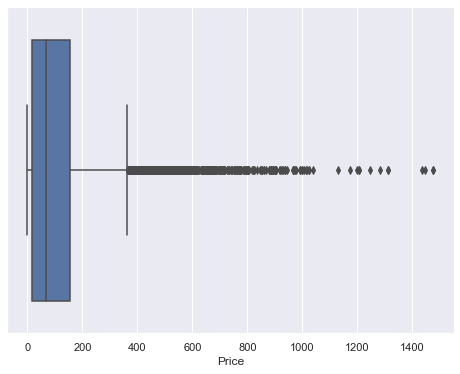

In [34]:
# Simple boxplot
plt.figure(figsize=(8,6))
sns.boxplot(Food_price_data.Price)

In [35]:
# Total amount of Commodities featured in the reviews:
total_commodity = Food_price_data["Commodity"].unique()
print("Number of Commodities: {}".format(len(total_commodity)))

Number of Commodities: 26


In [36]:
#list of unique commodities 
unique_commodity = Food_price_data["Commodity"].unique()
print("Total list of unique commodities: {}".format(len(unique_commodity)))
print(unique_commodity)

Total list of unique commodities: 26
['Maize' 'Gari' 'Rice (imported)' 'Sorghum' 'Cassava' 'Rice (local)'
 'Millet' 'Eggs' 'Meat (chicken)' 'Plantains (apentu)' 'Yam'
 'Maize (yellow)' 'Onions' 'Rice (paddy)' 'Cowpeas' 'Soybeans'
 'Tomatoes (local)' 'Eggplants' 'Cowpeas (white)' 'Plantains (apem)'
 'Tomatoes (navrongo)' 'Peppers (fresh)' 'Peppers (dried)' 'Yam (puna)'
 'Fish (mackerel fresh) ' 'Meat (chicken local) ']


In [37]:
# Group prices per commodity - count, min, max, sum Prices:
Food_price_data.groupby(['Commodity']).Price.agg([len, min, max, sum])

,len,min,max,sum
Commodity,,,,
Cassava,2128.0,0.870,1130.3963,116512.3743
Cowpeas,139.0,0.430,9.1700,480.0300
Cowpeas (white),102.0,84.860,924.7800,35336.0750
Eggplants,245.0,0.920,784.0700,26933.3950
Eggs,82.0,12.000,333.0500,8495.1100
Fish (mackerel fresh),101.0,1.450,640.0000,10927.9700
Gari,244.0,1.030,646.6700,27618.6850
Maize,2364.0,0.780,303.3333,209839.0129
Maize (yellow),230.0,0.790,274.7500,16087.3800


In [56]:
# Group prices per commodity - count, min, max, sum Prices:
Food_price_data.groupby(['Commodity', 'Market']).Price.agg([len, min, max, sum])

len      min       max         sum
Commodity  Market                                        
Cassava    Accra     182.0   1.8300  301.6450  11686.1479
           Badu        1.0  35.0000   35.0000     35.0000
           Banda       1.0  50.0000   50.0000     50.0000
           Bawku       1.0  60.0000   60.0000     60.0000
           Bimbilla    1.0  41.5625   41.5625     41.5625
...                    ...      ...       ...         ...
Yam (puna) Tamale     17.0   1.6600  416.6700   3363.6200
           Techiman   14.0   1.8300  853.0300   3646.8000
           Tema       14.0   3.7050  967.8200   5630.4200
           Wa          6.0   2.7800    4.5050     23.8450
           Yendi       6.0   1.3200  220.0000    445.7350

[557 rows x 4 columns]

<AxesSubplot:xlabel='Commodity'>

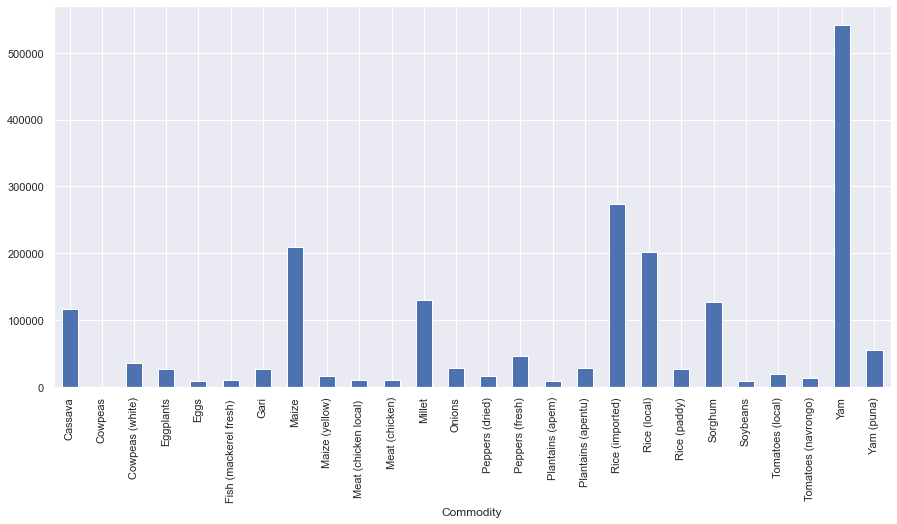

In [58]:
Food_price_data.groupby('Commodity').Price.sum().plot(kind='bar',figsize=(15,7))

<AxesSubplot:xlabel='Commodity'>

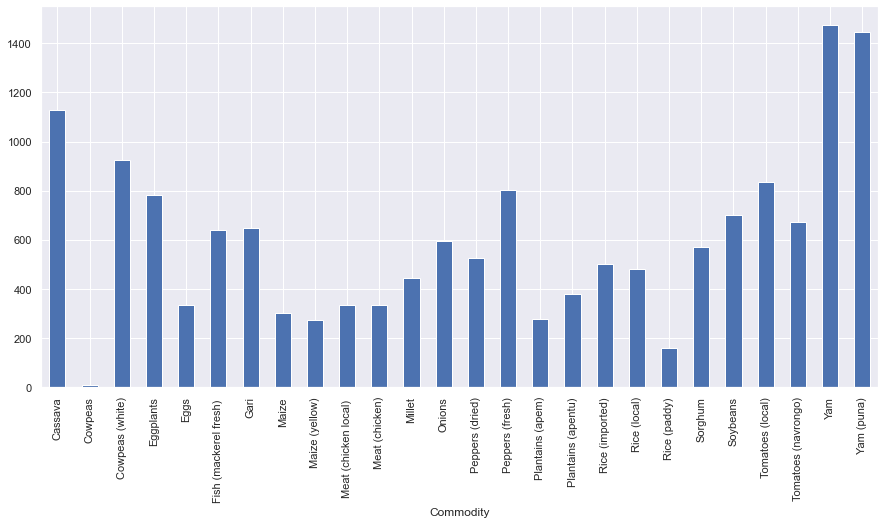

In [40]:
Food_price_data.groupby('Commodity').Price.max().plot(kind='bar',figsize=(15,7))

<AxesSubplot:xlabel='Commodity'>

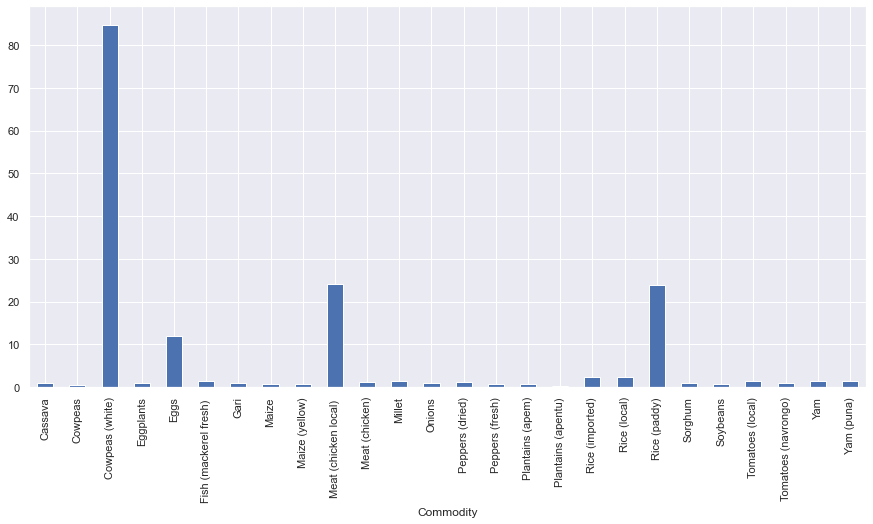

In [42]:
Food_price_data.groupby('Commodity').Price.min().plot(kind='bar',figsize=(15,7))

<AxesSubplot:xlabel='Market'>

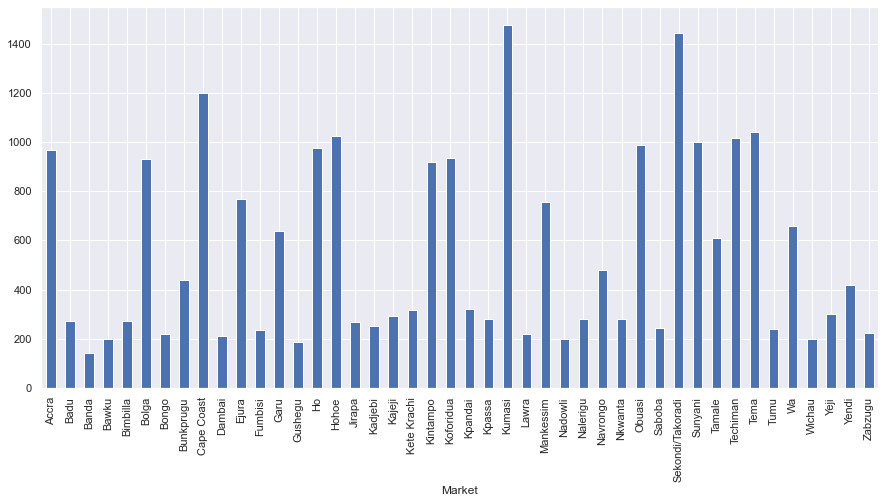

In [44]:
Food_price_data.groupby('Market').Price.max().plot(kind='bar',figsize=(15,7))

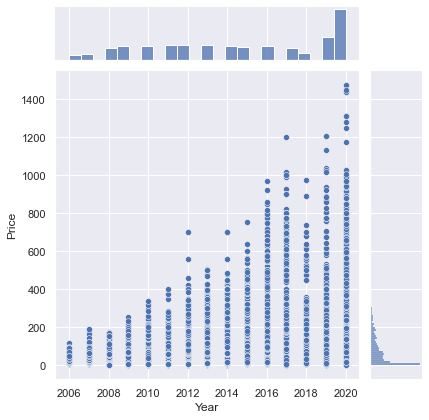

In [45]:
sns.jointplot(x='Year',y='Price',data=Food_price_data,kind='scatter')

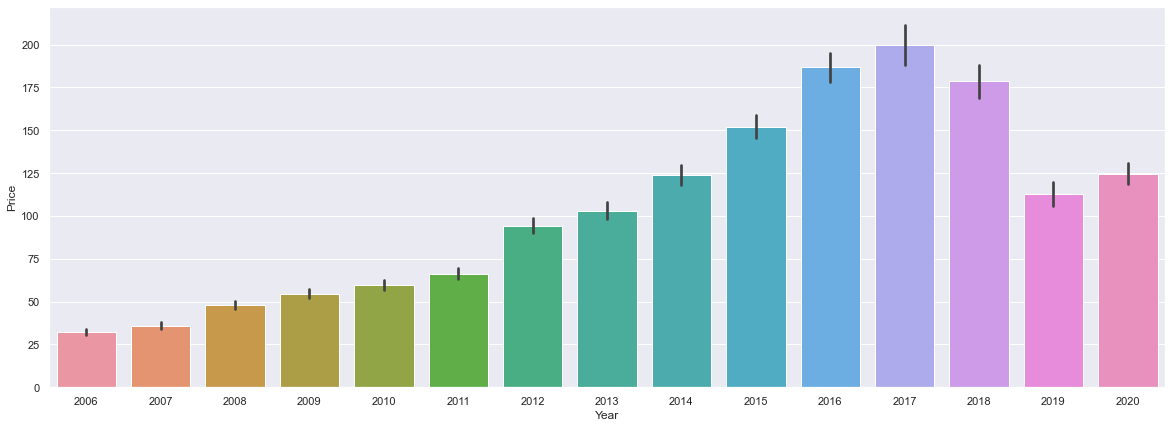

In [46]:
plt.figure(figsize=(20,7))
sns.barplot(x=Food_price_data['Year'], y= Food_price_data['Price'])
plt.show()

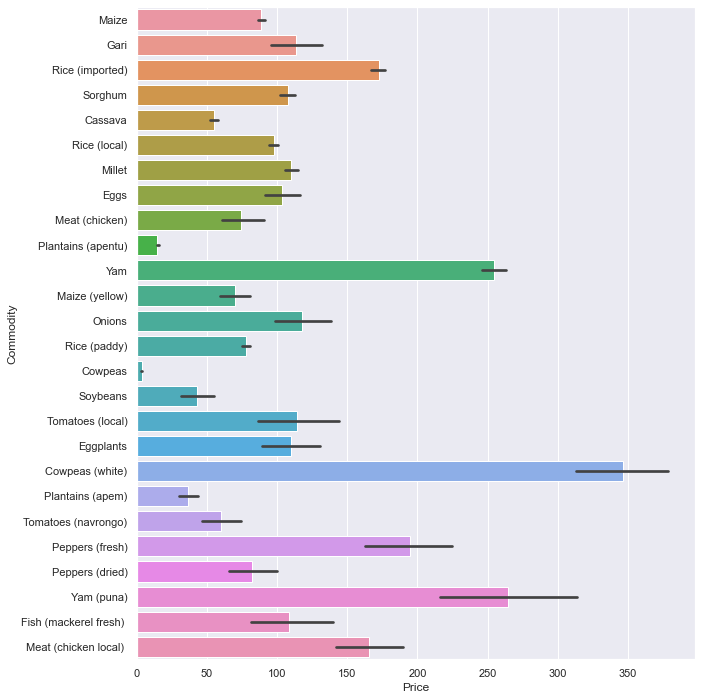

In [47]:
# Horizontal Bar plot
plt.figure(figsize=(10,12))
sns.barplot(x=Food_price_data['Price'], y= Food_price_data['Commodity'])
plt.show()

<Figure size 792x648 with 0 Axes>

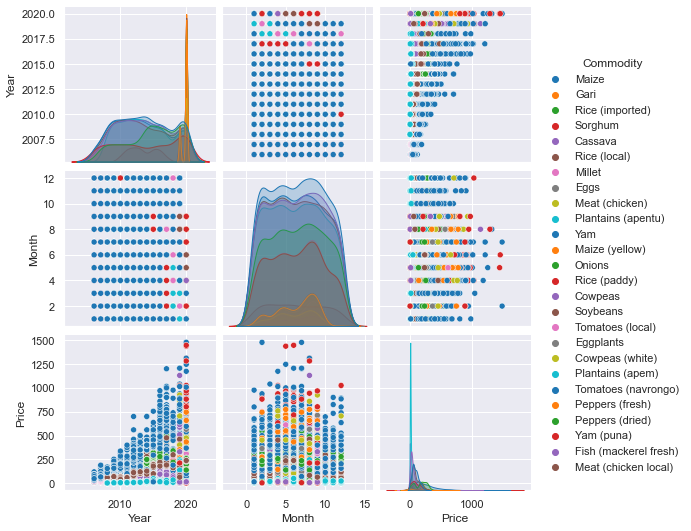

In [48]:
plt.figure(figsize =(11,9))
sns.pairplot(Food_price_data, hue = 'Commodity', palette ='tab10')
plt.show()

<Figure size 792x648 with 0 Axes>

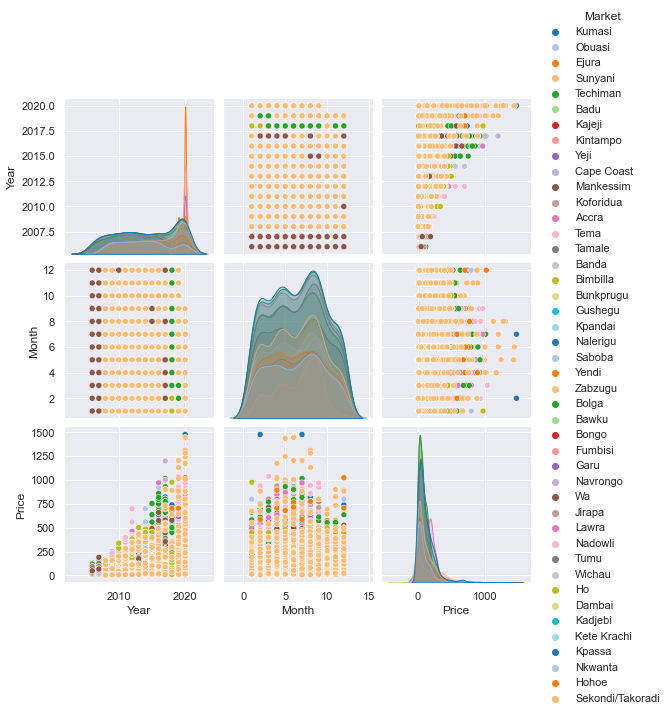

In [49]:
plt.figure(figsize=(11,9))
sns.pairplot(Food_price_data,hue = 'Market', palette ='tab20')
plt.show()

<AxesSubplot:xlabel='Commodity,Market'>

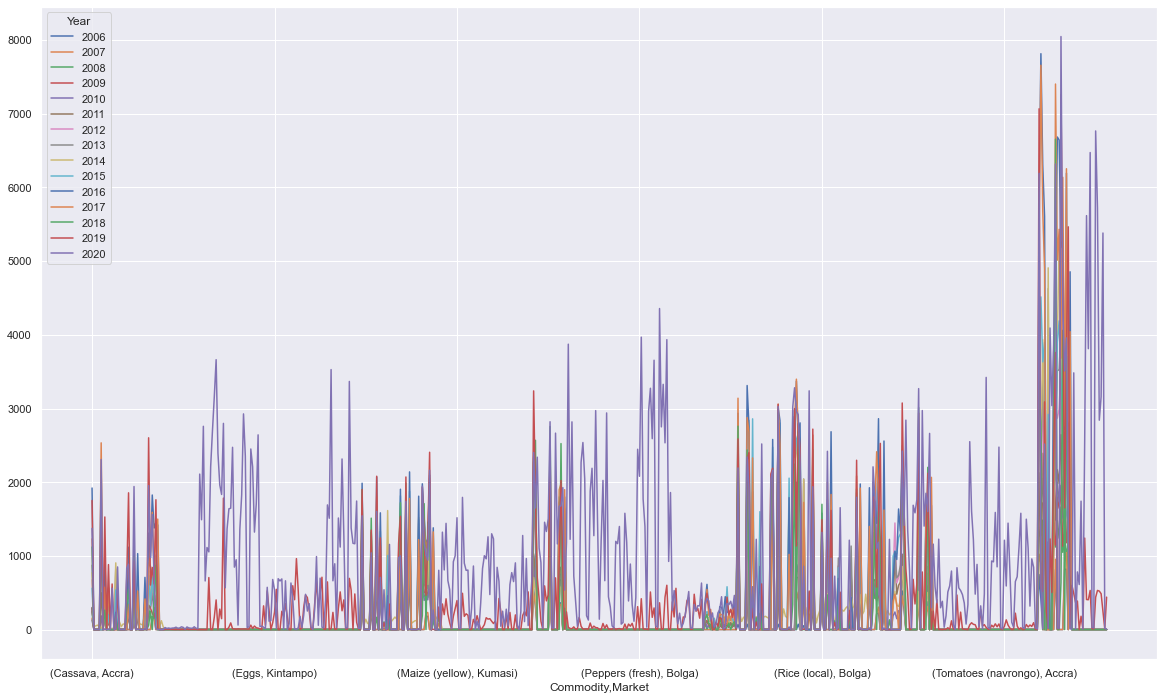

In [76]:
Food_price_data.pivot_table(index=['Commodity', 'Market'], columns='Year', values='Price',
                aggfunc='sum', fill_value=0).plot.line(stacked=False, figsize=(20,12))